In [1]:
IP = '10.208.234.8'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

In [3]:
import qcodes.instrument_drivers.rohde_schwarz.ZNB as ZNB
from qcodes.instrument_drivers.rohde_schwarz.ZNB import ZNBChannel
import qcodes

In [4]:
def get_data(param, freq_start = 100e6, freq_stop = 1e9, freq_num = 200, vna_power=-30):
    ZNB.ZNB.close_all()
    vna = ZNB.ZNB('VNA', f'TCPIP0::{IP}::INSTR', init_s_params=False)
    station = qcodes.Station(vna)
    
    vna.add_channel(param)

    vna.cont_meas_on()
    vna.display_single_window()
    vna.rf_on()

    freq_start = freq_start
    freq_stop = freq_stop
    freq_num = freq_num
    freq = np.linspace(freq_start, freq_stop, freq_num)

    vna.channels.format('Complex')

    vna.channels.start(freq_start)
    vna.channels.stop(freq_stop)
    vna.channels.npts(freq_num)

    vna.channels.power(vna_power)
    vna.channels.autoscale()
    
    trace = vna.channels.trace.get()[0]
    
    return {'freq':freq, 'trace':trace}
    

In [23]:
def av(num):
    all_data = []
    for i in range(num):
        all_data.append(list(get_data('S21')['trace']))
    all_data = np.array(all_data)
    return np.mean(all_data, axis=0)

In [24]:
new_data = get_data('S21')

Connected to: Rohde-Schwarz ZNB20-4Port (serial:1311601064101941, firmware:2.88) in 0.03s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qcodes/instrument/base.py:128: QCoDeSDeprecationWarning: Parameter trace_mag_phase on instrument VNA_S21 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qcodes/instrument/base.py:128: QCoDeSDeprecationWarning: Parameter trace on instrument VNA_S21 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qcodes/instrument/base.py:128: QCoDeSDeprecationWarning: Parameter trace_fixed_frequency on instrument VNA_S21 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
/Library/Frameworks/Python.framewor

Connected to: Rohde-Schwarz ZNB20-4Port (serial:1311601064101941, firmware:2.88) in 0.03s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qcodes/instrument/base.py:128: QCoDeSDeprecationWarning: Parameter trace_mag_phase on instrument VNA_S21 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qcodes/instrument/base.py:128: QCoDeSDeprecationWarning: Parameter trace on instrument VNA_S21 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qcodes/instrument/base.py:128: QCoDeSDeprecationWarning: Parameter trace_fixed_frequency on instrument VNA_S21 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
/Library/Frameworks/Python.framewor

Connected to: Rohde-Schwarz ZNB20-4Port (serial:1311601064101941, firmware:2.88) in 0.04s
Connected to: Rohde-Schwarz ZNB20-4Port (serial:1311601064101941, firmware:2.88) in 0.04s
Connected to: Rohde-Schwarz ZNB20-4Port (serial:1311601064101941, firmware:2.88) in 0.04s
Connected to: Rohde-Schwarz ZNB20-4Port (serial:1311601064101941, firmware:2.88) in 0.03s


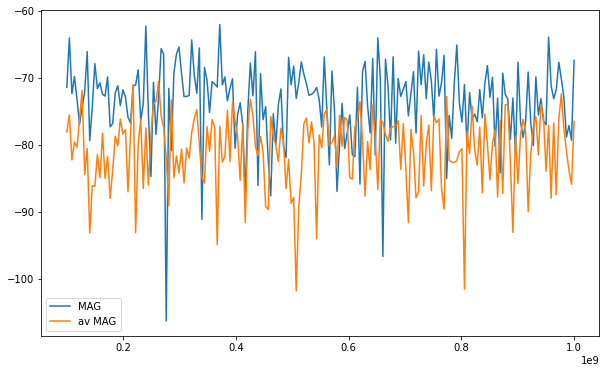

In [25]:
plt.figure(figsize=(10,6))
plt.plot(new_data['freq'], 20 * np.log10(np.abs(new_data['trace'])), label = 'MAG')
plt.plot(new_data['freq'], 20 * np.log10(np.abs(av(5))), label = 'av MAG')
plt.legend()
plt.show()

# plt.figure(figsize=(10,6))
# plt.plot(new_data['freq'], np.angle(new_data['trace']), label = 'Phase')
# plt.legend()
# plt.show()

In [28]:
with open('data.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['freq-Hz', 're', 'im'])
    for i in range(len(new_data['freq'])):
        writer.writerow([new_data['freq'][i], new_data['trace'][i].real, new_data['trace'][i].imag])

In [29]:
pd.read_csv('data.csv')

,freq-Hz,re,im
0,1.000000e+08,-0.000003,-0.000099
1,1.045226e+08,0.000028,0.000222
2,1.090452e+08,0.000244,-0.000076
3,1.135678e+08,0.000246,-0.000144
4,1.180905e+08,-0.000567,0.000211
...,...,...,...
195,9.819095e+08,0.000066,-0.000258
196,9.864322e+08,0.000128,-0.000140
197,9.909548e+08,0.000031,0.000138
198,9.954774e+08,-0.000026,0.000182


In [27]:
new_data['trace'][1].imag

0.0002219992831